# **Project data mining InsyaAllah yang ini berhasil**



---


**Naive Bayes Dataset** **Mentah**


---



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
import warnings

# membaca dataset
dataset = pd.read_csv('diabetes (1).csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# preprocessing data missing value
missing_values =dataset.isnull().sum()

# print
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# preprocessing data penskalaan fitur
# Melakukan penskalaan fitur menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang serupa
scaler = StandardScaler()
dataset_scaled = dataset.copy()
dataset_scaled.iloc[:, :-1] = scaler.fit_transform(dataset.iloc[:, :-1])

dataset_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [ ]:
# Memisahkan fitur dan target
X = dataset_scaled.drop(columns=['Outcome'])
y = dataset['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
y = pd.Series(y)
print(y.head(11))

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
Name: Outcome, dtype: int64


In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(X_train))
print("y_test = ", len(X_test))

X_train =  614
X_test =  154
y_train =  614
y_test =  154


In [ ]:
# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Membuat prediksi dan mengevaluasi model
y_pred = nb_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Hasil Akurasi Naive Bayes dengan Dataset Mentah:\n{:.1f}%".format(accuracy * 100))

Hasil Akurasi Naive Bayes dengan Dataset Mentah:
76.6%




---


**Implementasi Metode Elbow untuk Menentukan Jumlah Clustering**


---



In [ ]:
# Menentukan jumlah cluster yang optimal dengan metode Elbow
sse = []
k_range = range(1, 11) # testing 1 sampai 10 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Menetapkan n_init secara eksplisit
    kmeans.fit(dataset_scaled.iloc[:, :-1])
    sse.append(kmeans.inertia_)

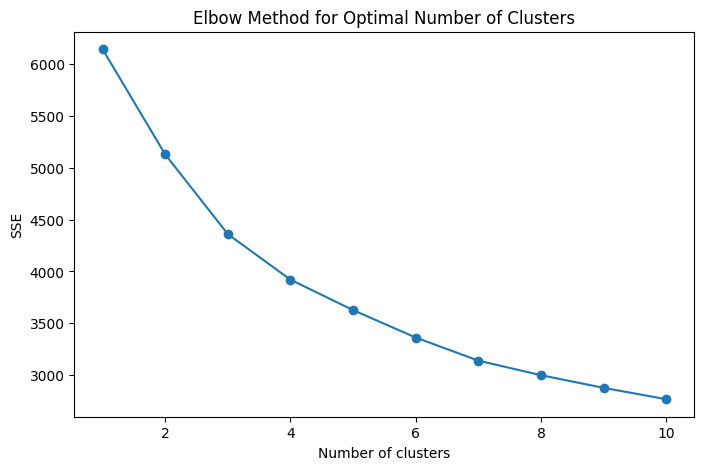

In [ ]:
# Membuat diagram dengan cara Plot SSE untuk melihat 'Elbow'
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Dari plot Elbow, kita dapat menentukan jumlah cluster yang optimal dengan mencari titik di mana penurunan SSE mulai melambat. Dari grafik, penurunan SSE melambat sekitar 3 atau 4 cluster. Jadi, jumlah cluster optimal kemungkinan adalah 3 atau 4. Kita akan memilih 3 cluster karena penurunan SSE menjadi lebih bertahap setelahnya.



---


**Melakukan Clustering K-Means**


---



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Membaca dataset
dataset = pd.read_csv('diabetes (1).csv')

In [ ]:
# Melakukan clustering dengan K-Means
# Menentukan jumlah Cluster dan inisialisasi titik awal lokasi sentroid

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset_scaled.iloc[:, :-1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Menambahkan kolom label cluster ke dataset
c

In [ ]:
# Menampilkan jumlah sampel dalam setiap klaster
print("Number of samples in each cluster:")
print(dataset_scaled['Cluster'].value_counts())


Number of samples in each cluster:
Cluster
1    337
2    216
0    215
Name: count, dtype: int64


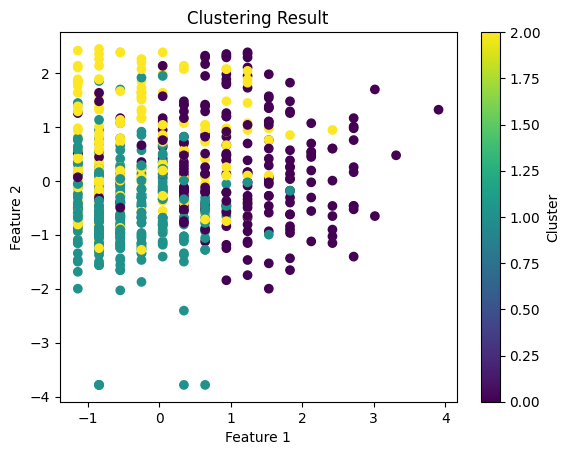

In [ ]:
# Visualisasi hasil clustering
plt.scatter(dataset_scaled.iloc[:, 0], dataset_scaled.iloc[:, 1], c=dataset_scaled['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Menyimpan dataset yang sudah di-cluster ke file CSV
dataset_scaled.to_csv('diabetes_clustered.csv', index=False)

In [ ]:
dataset = pd.read_csv('diabetes_clustered.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,1
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,1
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,2




---


**Naive Bayes dengan Dataset yang Telah di Clustering**


---



In [ ]:
# Membaca dataset yang sudah di-cluster
dataset_clustered = pd.read_csv('diabetes_clustered.csv')

In [ ]:
# Memisahkan fitur dan label

# drop dua kolom label yaitu outcome dan cluster agar mendapatkan variabel x yang berisi data fitur saja
X = dataset_clustered.drop(columns=['Outcome'])  # Menghapus kolom Outcome dan Cluster

# variabel y berisi data label, disini data label nya berbeda dari yang awalnya outcome menjadi cluster
y = dataset_clustered['Outcome']

In [ ]:
# isi dari variabel X adalah kolom fitur saja
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,1
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,1
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,2
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,1
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,1
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
# isi variabel y adalah data label saja yaitu kolom cluster

y = pd.Series(y)
print(y.head(11))

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
Name: Outcome, dtype: int64


In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(X_train))
print("y_test = ", len(X_test))

X_train =  614
X_test =  154
y_train =  614
y_test =  154


In [ ]:
# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Memprediksi label cluster pada data pengujian
y_pred = nb_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
# Membuat prediksi dan mengevaluasi model
y_pred = nb_model.predict(X_test)
report = classification_report(y_test, y_pred)

# menampilkan hasil akurasi klasifikasi Naive Bayes
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [ ]:
# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Hasil Akurasi Naive Bayes Setelah Dataset Melalui clustering:\n{:.1f}%".format(accuracy * 100))

Hasil Akurasi Naive Bayes Setelah Dataset Melalui clustering:
75.3%




---



**Metode Clustering K-Means terbukti berhasil meningkatkan tingkat akurasi, dari yang awalnya 75.3% meningkat menjadi 94.8% setelah melalui proses Clustering**

---



# **Tentang Clustering K-Means**

### Alur Clustering K-Means:
1. **Inisialisasi Sentroid**: Langkah pertama dalam algoritma K-Means adalah inisialisasi sentroid awal. Sentroid adalah titik pusat dari setiap cluster. Sentroid awal biasanya dipilih secara acak dari data.

2. **Assigning Data Points to Nearest Centroid**: Setiap sampel data diatribusikan ke klaster terdekat berdasarkan jarak Euclidean antara sentroid dan titik data. Sampel-sampel data ditempatkan dalam klaster yang memiliki sentroid terdekat.

3. **Updating Centroids**: Setelah semua sampel data ditempatkan dalam klaster, sentroid dari setiap klaster diperbarui dengan mengambil rata-rata dari semua titik data dalam klaster. Ini dilakukan untuk memperbarui posisi sentroid baru.

4. **Iterative Optimization**: Langkah 2 dan 3 diulang secara iteratif hingga kondisi berhenti yang ditentukan terpenuhi. Kondisi berhenti ini bisa berupa jumlah iterasi maksimum yang dicapai atau perubahan sentroid yang sangat kecil antara iterasi yang berurutan.

### Tujuan Clustering K-Means:
1. **Segmentasi Data**: Tujuan utama dari clustering K-Means adalah untuk membagi dataset menjadi kelompok-kelompok (klaster) yang homogen, di mana setiap sampel data memiliki kesamaan tinggi dengan sampel-sampel lain dalam klaster yang sama.

2. **Meminimalkan Varians Intra-klaster**: K-Means berusaha untuk meminimalkan varians dalam setiap klaster, sehingga memastikan bahwa sentroid dari setiap klaster mewakili dengan baik sampel-sampel yang ada dalam klaster tersebut.

3. **Pemahaman Struktur Data**: K-Means membantu dalam pemahaman struktur internal data dengan mengelompokkan sampel-sampel data yang serupa menjadi kelompok-kelompok tertentu. Ini membantu dalam menemukan pola-pola yang ada dalam data.

4. **Praproses untuk Analisis Lanjutan**: Hasil dari clustering K-Means dapat digunakan sebagai langkah pra-proses untuk analisis lanjutan seperti klasifikasi, regresi, atau segmentasi pelanggan.

5. **Penyederhanaan Data**: Dalam beberapa kasus, K-Means dapat membantu dalam mengurangi dimensi data dengan menggantikan fitur-fitur asli dengan label klaster. Ini dapat membantu dalam mengurangi kompleksitas analisis data.

# **Clutering Kolom (Gejala) atau Clustering Baris (Pasien) ?**

Dalam penelitian ini, data yang di-cluster adalah setiap baris yang merepresentasikan pasien. Setiap baris dalam dataset mengandung informasi tentang pasien tertentu, termasuk nilai-nilai gejala diabetes yang diamati pada pasien tersebut.

Ketika kita menggunakan algoritma clustering seperti K-Means, kita mengelompokkan pasien-pasien berdasarkan kesamaan fitur atau gejala yang diamati pada mereka. Setiap baris data (setiap pasien) dianggap sebagai titik dalam ruang fitur, di mana dimensi-dimensi ruang tersebut diberikan oleh atribut-atribut atau fitur-fitur yang diamati (misalnya, kadar glukosa darah, tekanan darah, indeks massa tubuh, dll.). Setiap klaster akan berisi pasien-pasien yang memiliki profil gejala yang serupa, yang dapat membantu dalam pemahaman lebih lanjut tentang karakteristik populasi pasien yang berbeda.

Kenapa yg di cluster bukan kolom gejala?

1. **Clustering Berdasarkan Setiap Baris (Pasien)**:
   - **Alur**: Dalam pendekatan ini, setiap baris dalam dataset, yang mewakili data dari satu pasien, dianggap sebagai titik dalam ruang fitur. Clustering dilakukan berdasarkan kesamaan gejala atau karakteristik yang diamati pada setiap pasien.
   - **Tujuan**: Tujuan utama adalah untuk mengelompokkan pasien-pasien berdasarkan profil gejala yang serupa, sehingga kita dapat mengidentifikasi pola-pola atau kelompok-kelompok yang muncul dalam data pasien diabetes.
   - **Keuntungan**: Pendekatan ini membantu dalam memahami perbedaan antara pasien-pasien dan mengidentifikasi kelompok-kelompok pasien dengan profil gejala yang mirip.

2. **Clustering Berdasarkan Kolom (Gejala)**:
   - **Alur**: Dalam pendekatan ini, setiap kolom dalam dataset, yang mewakili satu gejala diabetes, dianggap sebagai titik dalam ruang fitur. Clustering dilakukan berdasarkan kesamaan pola-pola gejala di antara pasien-pasien.
   - **Tujuan**: Tujuan utama adalah untuk mengelompokkan gejala-gejala yang serupa atau memiliki pola yang mirip dalam data pasien diabetes. Ini dapat membantu dalam mengidentifikasi kelompok-kelompok gejala yang muncul bersama-sama pada pasien-pasien tertentu.
   - **Keuntungan**: Pendekatan ini dapat membantu dalam memahami hubungan antara gejala-gejala diabetes dan mengidentifikasi gejala-gejala yang sering muncul bersama-sama pada pasien-pasien.



Kedua pendekatan ini memiliki tujuan yang berbeda tergantung pada konteks analisis dan tujuan penelitian. Biasanya, clustering berdasarkan setiap baris (pasien) lebih umum digunakan dalam analisis diabetes untuk memahami karakteristik pasien dan pola gejala yang muncul, sementara clustering berdasarkan kolom (gejala) dapat membantu dalam mengidentifikasi hubungan antara gejala-gejala diabetes itu sendiri.

# Trial and Error

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load dataset
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)


In [ ]:
# Define columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
# Apply K-Means clustering to each column
n_clusters = 4
cluster_labels = {}
for col in columns:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data[col + '_Cluster'] = kmeans.fit_predict(data[[col]])
    cluster_centers = kmeans.cluster_centers_
    cluster_labels[col] = {i: round(cluster_centers[i][0], 2) for i in range(n_clusters)}  # Define label for each cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Define categorical labels for each cluster
categorical_labels = {
    col: sorted(cluster_labels[col].items(), key=lambda x: x[0]) for col in columns
}

In [ ]:
# Replace numeric values with categorical labels
for col in columns:
    cluster_col = col + '_Cluster'
    data[col] = data[cluster_col].map({idx: f'{label} ({cluster_labels[col][idx]})' for idx, label in enumerate(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])})

    # Print categorical labels for the current column
    print(f"Keterangan untuk kolom {col}:")
    for cluster_num, (idx, label) in enumerate(categorical_labels[col], start=1):
        print(f"{cluster_num} = {label}")

    print()  # Add an empty line for separation


Keterangan untuk kolom Pregnancies:
1 = 3.91
2 = 11.36
3 = 0.98
4 = 7.27

Keterangan untuk kolom Glucose:
1 = 103.99
2 = 173.03
3 = 132.77
4 = 75.84

Keterangan untuk kolom BloodPressure:
1 = 74.44
2 = 2.21
3 = 59.48
4 = 90.45

Keterangan untuk kolom SkinThickness:
1 = 0.13
2 = 42.83
3 = 18.27
4 = 30.27

Keterangan untuk kolom Insulin:
1 = 224.69
2 = 4.12
3 = 509.17
4 = 103.07

Keterangan untuk kolom BMI:
1 = 33.37
2 = 42.76
3 = 0.0
4 = 25.21

Keterangan untuk kolom DiabetesPedigreeFunction:
1 = 0.26
2 = 0.61
3 = 1.07
4 = 1.96

Keterangan untuk kolom Age:
1 = 33.35
2 = 60.31
3 = 23.94
4 = 44.74



In [ ]:
# Drop cluster columns
data.drop(columns=[col + '_Cluster' for col in columns], inplace=True)

In [ ]:
# Display the updated dataset
print(data.head())

       Pregnancies            Glucose     BloodPressure     SkinThickness  \
0  Cluster4 (7.27)  Cluster3 (132.77)  Cluster1 (74.44)  Cluster4 (30.27)   
1  Cluster3 (0.98)   Cluster4 (75.84)  Cluster3 (59.48)  Cluster4 (30.27)   
2  Cluster4 (7.27)  Cluster2 (173.03)  Cluster3 (59.48)   Cluster1 (0.13)   
3  Cluster3 (0.98)   Cluster4 (75.84)  Cluster3 (59.48)  Cluster3 (18.27)   
4  Cluster3 (0.98)  Cluster3 (132.77)  Cluster3 (59.48)  Cluster4 (30.27)   

             Insulin               BMI DiabetesPedigreeFunction  \
0    Cluster2 (4.12)  Cluster1 (33.37)          Cluster2 (0.61)   
1    Cluster2 (4.12)  Cluster4 (25.21)          Cluster1 (0.26)   
2    Cluster2 (4.12)  Cluster4 (25.21)          Cluster2 (0.61)   
3  Cluster4 (103.07)  Cluster4 (25.21)          Cluster1 (0.26)   
4  Cluster1 (224.69)  Cluster2 (42.76)          Cluster4 (1.96)   

                Age  Outcome  
0  Cluster4 (44.74)        1  
1  Cluster1 (33.35)        0  
2  Cluster1 (33.35)        1  
3  Cluster

In [ ]:
# Save the updated dataset
data.to_csv('diabetes_ready_to_nb.csv', index=False)

In [ ]:
import pandas as pd

# Baca file diabetes ready
file_path = 'diabetes_ready_to_nb.csv'
data = pd.read_csv(file_path)

In [ ]:
# Remove floating-point numbers within parentheses
data = data.replace(regex={r'\(\d+\.\d+\)': ''})

# Replace categorical values with numerical values
data = data.replace({'Cluster1 ': 1, 'Cluster2 ': 2, 'Cluster3 ': 3, 'Cluster4 ': 4})




In [ ]:
# Simpan hasil transformasi ke dalam file CSV
data.to_csv('diabetes_ready_to_nbfinal.csv', index=False)


**NAIVE** **BAYES**

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('diabetes_ready_to_nbfinal.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,3,1,4,2,1,2,4,1
1,3,4,3,4,2,4,1,1,0
2,4,2,3,1,2,4,2,1,1
3,3,4,3,3,4,4,1,3,0
4,3,3,3,4,1,2,4,1,1


In [ ]:
x = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values

In [ ]:
x

array([[4, 3, 1, ..., 1, 2, 4],
       [3, 4, 3, ..., 4, 1, 1],
       [4, 2, 3, ..., 4, 2, 1],
       ...,
       [1, 3, 1, ..., 4, 1, 1],
       [3, 3, 3, ..., 1, 1, 4],
       [3, 1, 1, ..., 1, 1, 3]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(x_train))
print("y_test = ", len(x_test))

x_train =  614
x_test =  154
y_train =  614
y_test =  154


In [ ]:
# ini dipake kalau ingin pake GaussNB

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
x_train

array([[ 0.35220669,  1.65681775, -0.15007772, ...,  0.57361845,
        -0.7390458 ,  0.35147873],
       [ 1.27244034, -1.1025478 , -0.98023734, ...,  1.32458162,
         2.03633109,  1.29800477],
       [ 0.35220669,  0.73702923,  0.68008191, ...,  1.32458162,
         0.64864265,  0.35147873],
       ...,
       [-0.56802696, -1.1025478 ,  1.51024153, ..., -0.17734472,
         2.03633109, -1.54157337],
       [ 0.35220669,  0.73702923, -0.15007772, ..., -0.17734472,
        -0.7390458 , -1.54157337],
       [ 0.35220669,  0.73702923,  1.51024153, ...,  1.32458162,
        -0.7390458 ,  0.35147873]])

In [ ]:
x_test

array([[ 1.27244034, -1.1025478 ,  0.68008191, ..., -0.9283079 ,
        -0.7390458 ,  1.29800477],
       [ 0.35220669, -1.1025478 , -0.98023734, ..., -0.9283079 ,
        -0.7390458 ,  0.35147873],
       [ 0.35220669, -1.1025478 ,  0.68008191, ..., -0.9283079 ,
        -0.7390458 ,  0.35147873],
       ...,
       [ 1.27244034, -1.1025478 , -0.98023734, ..., -0.9283079 ,
         0.64864265, -0.59504732],
       [ 0.35220669,  0.73702923, -0.98023734, ...,  1.32458162,
        -0.7390458 , -1.54157337],
       [ 1.27244034,  1.65681775, -0.98023734, ..., -0.9283079 ,
         0.64864265, -1.54157337]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

# from sklearn.naive_bayes import CategoricalNB
# classifier = CategoricalNB()
# classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
classifier.predict_proba

<bound method _BaseNB.predict_proba of GaussianNB()>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[82 17]
 [21 34]]


In [ ]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi: %f persen"%(akurasi* 100))

Tingkat Akurasi: 75.324675 persen


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

# Menggunakan Teknik Ensemble Bagging
bagging_classifier = BaggingClassifier(base_estimator=CategoricalNB(), n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi = classification_report(y_test, y_pred)
print(akurasi)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ValueError: Negative values in data passed to CategoricalNB (input X)

In [ ]:
import math
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(y_test, y_pred)
akurasi_persen = math.ceil(akurasi * 100)
print("Tingkat Akurasi: %d persen" % akurasi_persen)

Tingkat Akurasi: 76 persen


**menetukan jumlah cluster menggunakan elbow**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)

In [ ]:
# Define columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

In [ ]:
# Elbow method to determine the optimal number of clusters
sse = []
cluster_range = range(1, 11)  # Testing for 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

**coba** **coba**

coba naive bayes

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)


In [ ]:
# Define columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
# Apply K-Means clustering to each column with 4 clusters
n_clusters = 4  # Optimal number of clusters based on the Elbow plot
for col in columns:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data[col + '_Cluster'] = kmeans.fit_predict(data[[col]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Convert cluster labels to categorical labels
for col in columns:
    data[col] = data[col + '_Cluster'].map({0: 'Very Low', 1: 'Low', 2: 'Medium', 3: 'High'})


In [ ]:
# Drop the cluster columns
data.drop(columns=[col + '_Cluster' for col in columns], inplace=True)


In [ ]:
# Encode categorical labels to numerical values
for col in columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
# Split the data into features and target
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply Naive Bayes classifier
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# Predict and evaluate
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy: {:.4f}%".format(accuracy * 100))

Confusion Matrix:
 [[77 22]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy: 75.3247%


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('fixplis.csv')
dataset.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = '/mnt/data/fixplis.csv'
data = pd.read_csv('fixplis.csv')

# Split dataset into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate GaussianNB with scaled data
gaussian_nb = GaussianNB()
gaussian_nb_accuracy = evaluate_model(gaussian_nb, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb_accuracy = evaluate_model(multinomial_nb, X_train, X_test, y_train, y_test)

# Evaluate BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb_accuracy = evaluate_model(bernoulli_nb, X_train, X_test, y_train, y_test)

# Print accuracies
print(f"GaussianNB Accuracy: {gaussian_nb_accuracy:.4f}")
print(f"MultinomialNB Accuracy: {multinomial_nb_accuracy:.4f}")
print(f"BernoulliNB Accuracy: {bernoulli_nb_accuracy:.4f}")

# Cross-validation with GaussianNB
cross_val_scores = cross_val_score(gaussian_nb, X, y, cv=5)
print(f"Cross-Validation Accuracy with GaussianNB: {cross_val_scores.mean():.4f}")

categor


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = '/mnt/data/fixplis.csv'
data = pd.read_csv('fixplis.csv')

# Split dataset into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = GaussianNB()

# Define the hyperparameters to tune
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy:.4f}")


coba lagi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# Membaca dataset
dataset = pd.read_csv('diabetes_ready_to_nbfinal.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,3,1,4,2,1,2,4,1
1,3,4,3,4,2,4,1,1,0
2,4,2,3,1,2,4,2,1,1
3,3,4,3,3,4,4,1,3,0
4,3,3,3,4,1,2,4,1,1


In [ ]:
# Memisahkan fitur (x) dan label (y)
x = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values

In [ ]:
# Membagi dataset menjadi training set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Mengimputasi nilai hilang
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
# Menggunakan Teknik Ensemble Bagging
bagging_classifier = BaggingClassifier(base_estimator=CategoricalNB(), n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi = classification_report(y_test, y_pred)
print(akurasi)

akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi Setelah Bagging: %f persen"%(akurasi * 100))

[[77 22]
 [15 40]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154

Tingkat Akurasi Setelah Bagging: 75.974026 persen


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# Membaca dataset
dataset = pd.read_csv('diabetes_ready_to_nbfinal.csv')
dataset.head()

# Memisahkan fitur (x) dan label (y)
x = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values

# Membagi dataset menjadi training set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mengimputasi nilai hilang
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Grid Search untuk Hyperparameter Tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi = classification_report(y_test, y_pred)
print(akurasi)

akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi Setelah Grid Search: %f persen"%(akurasi * 100))

# Menggunakan Teknik Ensemble Bagging
bagging_classifier = BaggingClassifier(base_estimator=CategoricalNB(), n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi = classification_report(y_test, y_pred)
print(akurasi)

akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi Setelah Bagging: %f persen"%(akurasi * 100))


Best parameters found:  {'alpha': 0.1, 'fit_prior': True}
Best accuracy found:  0.7492069838731173
[[75 24]
 [16 39]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154

Tingkat Akurasi Setelah Grid Search: 74.025974 persen
[[77 22]
 [15 40]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154

Tingkat Akurasi Setelah Bagging: 75.974026 persen


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


coba ulang

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
1    337
2    216
0    215
Name: count, dtype: int64


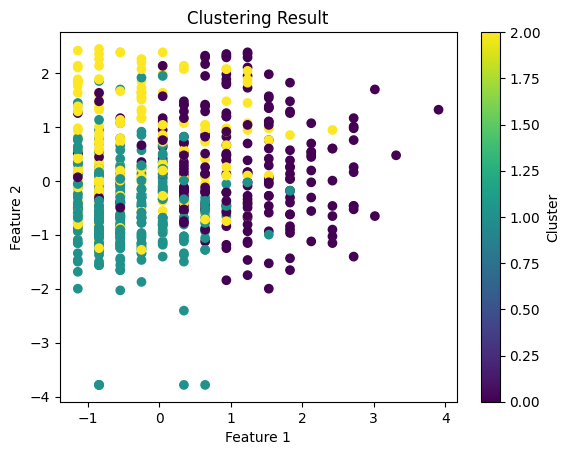

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca dataset
dataset = pd.read_csv('diabetes (1).csv')

# Preprocessing data
scaler = StandardScaler()
dataset_scaled = dataset.copy()
dataset_scaled.iloc[:, :-1] = scaler.fit_transform(dataset.iloc[:, :-1])

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Misalnya, kita akan mencoba 3 cluster
kmeans.fit(dataset_scaled.iloc[:, :-1])  # Memilih semua fitur kecuali kolom terakhir (target)

# Menambahkan kolom label cluster ke dataset
dataset_scaled['Cluster'] = kmeans.labels_

# Melihat distribusi cluster
print(dataset_scaled['Cluster'].value_counts())

# Visualisasi hasil clustering
plt.scatter(dataset_scaled.iloc[:, 0], dataset_scaled.iloc[:, 1], c=dataset_scaled['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Menambahkan kolom label klaster ke data yang sudah di-preprocessing
dataset_scaled['Cluster'] = kmeans.labels_

# Menyimpan data yang sudah di-cluster ke file CSV baru
dataset_scaled.to_csv('diabetes_clustered.csv', index=False)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Memisahkan fitur dan target
X = dataset_scaled.drop(columns=['Outcome', 'Cluster'])  # Menghapus kolom Outcome dan Cluster
y = dataset_scaled['Cluster']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Memprediksi label cluster pada data pengujian
y_pred = nb_model.predict(X_test)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes after clustering: {accuracy}')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Membaca dataset
dataset = pd.read_csv('diabetes (1).csv')

# Preprocessing data
scaler = StandardScaler()
dataset_scaled = dataset.copy()
dataset_scaled.iloc[:, :-1] = scaler.fit_transform(dataset.iloc[:, :-1])

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset_scaled.iloc[:, :-1])

# Menambahkan kolom label cluster ke dataset
dataset_scaled['Cluster'] = kmeans.labels_

# Menampilkan jumlah sampel dalam setiap klaster
print("Number of samples in each cluster:")
print(dataset_scaled['Cluster'].value_counts())

# Visualisasi hasil clustering
plt.scatter(dataset_scaled.iloc[:, 0], dataset_scaled.iloc[:, 1], c=dataset_scaled['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Menyimpan dataset yang sudah di-cluster ke file CSV
dataset_scaled.to_csv('diabetes_clustered.csv', index=False)

In [ ]:
# Membaca dataset yang sudah di-cluster
dataset_clustered = pd.read_csv('diabetes_clustered.csv')

# Memisahkan fitur dan target
X = dataset_clustered.drop(columns=['Outcome', 'Cluster'])  # Menghapus kolom Outcome dan Cluster
y = dataset_clustered['Cluster']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Memprediksi label cluster pada data pengujian
y_pred = nb_model.predict(X_test)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes after clustering: {accuracy}')


# Cipa Section

# Mei Section

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load dataset
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# preprocessing data missing value
missing_values =dataset.isnull().sum()

# print
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
x = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values